<img alt="BannerDataScience" width="100%" src="https://raw.githubusercontent.com/rodrigomariamorgao/portfolio_data_science/master/banner.png">

---

# Análise dos Dados do Airbnb - *Tokyo, Japão*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Tokyo (Japão), e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados nesta análise foram obtidos a partir do site independente [Inside Airbnb](http://insideairbnb.com/index.html).

Para esta análise exploratória, foi baixado apenas o arquivo *`listings.csv` [Summary information and metrics for listings in Tokyo (good for visualisations)]*, atualizado em 28 de abril de 2020.

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2020-04-28/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo demostrar a situação inicial dos dados e permitir um entendimento de como os mesmos estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome do imóvel anunciado
* `host_id` - número de id do proprietário (anfitrião) do imóvel
* `host_name` - nome do anfitrião
* `neighbourhood_group` - zona do bairro
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude do imóvel
* `longitude` - coordenada da longitude do imóvel
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que o imóvel possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,NaN,Shibuya Ku,35.67152,139.71203,Private room,4183,28,18,2018-07-28,0.18,3,89
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,11048,3,165,2020-03-04,1.57,1,271
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,NaN,Nerima Ku,35.74267,139.65810,Entire home/apt,4171,28,113,2020-02-17,1.18,2,241
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",NaN,Setagaya Ku,35.66443,139.65707,Entire home/apt,6952,28,103,2020-04-16,1.39,3,364
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,NaN,Nerima Ku,35.74264,139.65832,Entire home/apt,3957,28,103,2019-10-04,1.12,2,340


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [10]:
# identificar o volume de dados do DataFrame
print("Variáveis:\t {}\n".format(df.shape[1]))
print("Entradas:\t {}".format(df.shape[0]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Variáveis:	 16

Entradas:	 15352


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está relacionado diretamente à quantidade de dados faltantes. É importante compreender logo no início da análise se esses valores nulos são significativos comparado ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos abaixo de 20% das linhas.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.170010
last_review                       0.170010
host_name                         0.000717
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

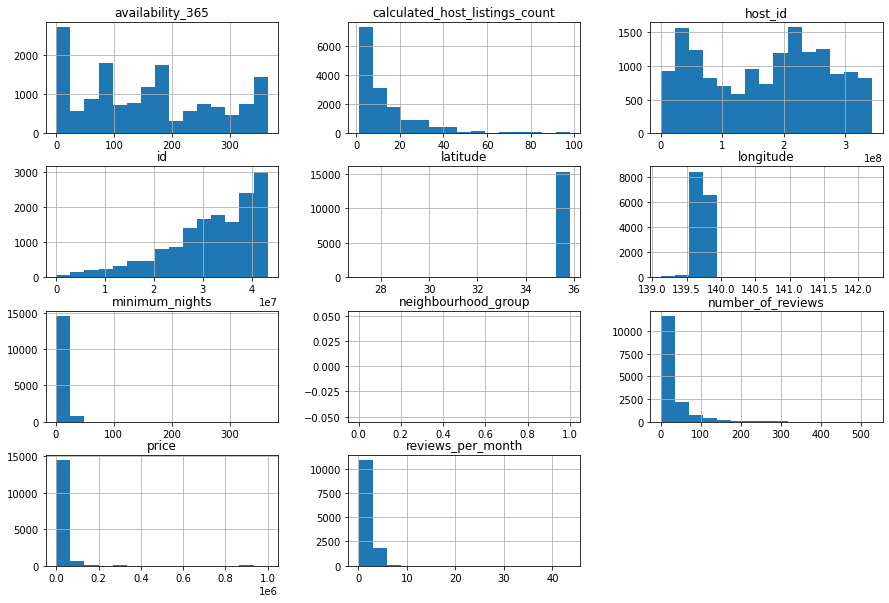

In [8]:
# plotar histogramas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [17]:
# calcular a média da coluna `price`
df.price.mean()

26241.576667535173

### **Q4. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn


In [15]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.033829,-0.040454,0.019843,0.192638,0.031753
minimum_nights,-0.033829,1.000000,-0.022318,-0.099575,0.016700,0.044924
number_of_reviews,-0.040454,-0.022318,1.000000,0.660470,-0.172444,0.013800
reviews_per_month,0.019843,-0.099575,0.660470,1.000000,-0.134453,0.031542
calculated_host_listings_count,0.192638,0.016700,-0.172444,-0.134453,1.000000,0.073542
availability_365,0.031753,0.044924,0.013800,0.031542,0.073542,1.000000


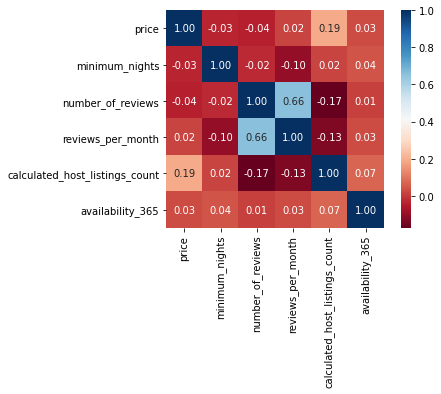

In [18]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Nesse *heatmap* podemos verificar que as colunas *number_of_reviews* e *reviews_per_month* possuem o coeficiente de correlação de 66%.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [19]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    10531
Private room        3346
Hotel room           751
Shared room          724
Name: room_type, dtype: int64

In [20]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.685969
Private room       0.217952
Hotel room         0.048919
Shared room        0.047160
Name: room_type, dtype: float64

Analisando as porcentagens retornadas, vemos que quase 70% dos imóveis disponíves na cidade de Tokyo são do tipo casas inteiras / apartamento.

### **Q6. Qual a localidade mais cara de Tokyo?**
Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.


In [21]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Hachioji Shi    201211.235294
Chiyoda Ku       76252.141667
Edogawa Ku       57404.505338
Chuo Ku          41228.404918
Taito Ku         31568.802539
Machida Shi      31508.184211
Toshima Ku       30767.268218
Arakawa Ku       29799.388206
Shibuya Ku       27043.040183
Bunkyo Ku        25416.790576
Name: price, dtype: float64

(35.4, 35.9)

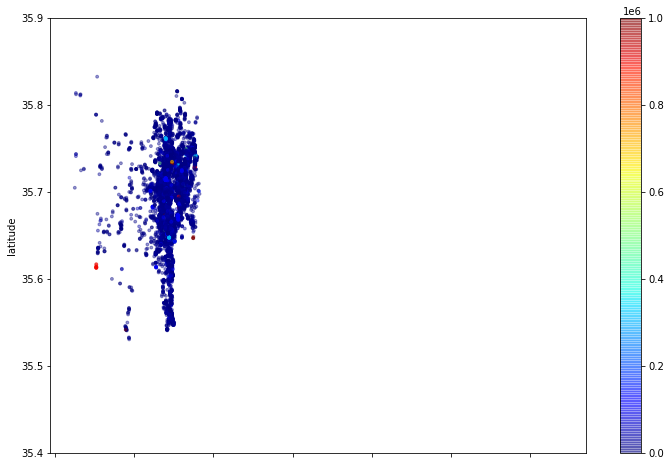

In [54]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));
plt.ylim(35.4,35.9)

De acordo com o grático plotado acima, os imóveis se concentram próximos uns dos outros.

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [26]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

3.293968212610735

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb para conhecimento das *features* presentes na cidade de Tokyo, no Japão.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.